In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [9]:
def generate_time_series(batch_size, n_steps):
    freq1, freq2, offset1, offset2 = np.random.rand(4, batch_size, 1)
    time = np.linspace(0, 1, n_steps)
    series = 0.5 * np.sin((time - offset1) * (freq1 * 10 + 10))
    series += 0.2 * np.sin((time - offset2) * (freq2 * 20 + 20))
    series += 0.1 * (np.random.rand(batch_size, n_steps) - 0.5)
    return series[...,np.newaxis].astype(np.float32)

In [11]:
np.random.seed(42)

n_steps = 50
series = generate_time_series(10000, n_steps + 1)
x_train, y_train = series[:7000, :n_steps], series[:7000, -1]
x_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -1]
x_test, y_test = series[9000:, n_steps], series[9000:, -1]

In [17]:
y_pred = x_valid[:, -1]
np.mean(keras.losses.mean_squared_error(y_valid, y_pred))

0.020211367

In [18]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[50, 1]),
    keras.layers.Dense(1)
])

model.compile(optimizer='Adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=20)

Epoch 1/20
219/219 [==============================] - 0s 409us/step - loss: 0.1415
Epoch 2/20
219/219 [==============================] - 0s 414us/step - loss: 0.0362
Epoch 3/20
219/219 [==============================] - 0s 416us/step - loss: 0.0187
Epoch 4/20
219/219 [==============================] - 0s 412us/step - loss: 0.0124
Epoch 5/20
219/219 [==============================] - 0s 412us/step - loss: 0.0103
Epoch 6/20
219/219 [==============================] - 0s 455us/step - loss: 0.0089
Epoch 7/20
219/219 [==============================] - 0s 628us/step - loss: 0.0078
Epoch 8/20
219/219 [==============================] - 0s 428us/step - loss: 0.0069
Epoch 9/20
219/219 [==============================] - 0s 481us/step - loss: 0.0064
Epoch 10/20
219/219 [==============================] - 0s 430us/step - loss: 0.0060
Epoch 11/20
219/219 [==============================] - 0s 421us/step - loss: 0.0055
Epoch 12/20
219/219 [==============================] - 0s 412us/step - loss: 0.0052
E

In [19]:
model.evaluate(x_valid, y_valid)

63/63 [==============================] - 0s 486us/step - loss: 0.0039


0.003887005615979433

In [20]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(1, input_shape=[None, 1])
])

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.compile(optimizer='Adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=20)

Epoch 1/20
219/219 [==============================] - 1s 4ms/step - loss: 0.2649
Epoch 2/20
219/219 [==============================] - 1s 4ms/step - loss: 0.1216
Epoch 3/20
219/219 [==============================] - 1s 4ms/step - loss: 0.0733
Epoch 4/20
219/219 [==============================] - 1s 4ms/step - loss: 0.0592
Epoch 5/20
219/219 [==============================] - 1s 4ms/step - loss: 0.0506
Epoch 6/20
219/219 [==============================] - 1s 4ms/step - loss: 0.0431
Epoch 7/20
219/219 [==============================] - 1s 4ms/step - loss: 0.0385
Epoch 8/20
219/219 [==============================] - 1s 4ms/step - loss: 0.0350
Epoch 9/20
219/219 [==============================] - 1s 4ms/step - loss: 0.0308
Epoch 10/20
219/219 [==============================] - 1s 4ms/step - loss: 0.0288
Epoch 11/20
219/219 [==============================] - 1s 4ms/step - loss: 0.0259
Epoch 12/20
219/219 [==============================] - 1s 4ms/step - loss: 0.0238
Epoch 13/20
219/219 [====

In [23]:
model.evaluate(x_valid, y_valid)

63/63 [==============================] - 0s 1ms/step - loss: 0.0140


0.013981986790895462

In [24]:
keras.backend.clear_session()

In [32]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20, return_sequences=True),
    keras.layers.SimpleRNN(1)
])

In [33]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_2 (SimpleRNN)     (None, None, 20)          440       
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 20)          820       
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, 1)                 22        
Total params: 1,282
Trainable params: 1,282
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.compile(optimizer='Adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=20)

Epoch 1/20
219/219 [==============================] - 4s 10ms/step - loss: 0.1098
Epoch 2/20
219/219 [==============================] - 2s 10ms/step - loss: 0.0078
Epoch 3/20
219/219 [==============================] - 2s 10ms/step - loss: 0.0058
Epoch 4/20
219/219 [==============================] - 2s 10ms/step - loss: 0.0052
Epoch 5/20
219/219 [==============================] - 2s 10ms/step - loss: 0.0045
Epoch 6/20
219/219 [==============================] - 2s 10ms/step - loss: 0.0040
Epoch 7/20
219/219 [==============================] - 2s 10ms/step - loss: 0.0039
Epoch 8/20
219/219 [==============================] - 2s 10ms/step - loss: 0.0035
Epoch 9/20
219/219 [==============================] - 2s 10ms/step - loss: 0.0035
Epoch 10/20
219/219 [==============================] - 2s 10ms/step - loss: 0.0036
Epoch 11/20
219/219 [==============================] - 2s 10ms/step - loss: 0.0034
Epoch 12/20
219/219 [==============================] - 2s 10ms/step - loss: 0.0032
Epoch 13/20
2

In [27]:
model.evaluate(x_valid, y_valid)

63/63 [==============================] - 0s 3ms/step - loss: 0.0029


0.002926837420091033

In [34]:
keras.backend.clear_session()
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20),
    keras.layers.Dense(1)
])

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, None, 20)          440       
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 20)                820       
_________________________________________________________________
dense (Dense)                (None, 1)                 21        
Total params: 1,281
Trainable params: 1,281
Non-trainable params: 0
_________________________________________________________________


In [36]:
model.compile(optimizer='Adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=20)

Epoch 1/20
219/219 [==============================] - 2s 8ms/step - loss: 0.0334
Epoch 2/20
219/219 [==============================] - 2s 7ms/step - loss: 0.0050
Epoch 3/20
219/219 [==============================] - 2s 7ms/step - loss: 0.0034
Epoch 4/20
219/219 [==============================] - 2s 7ms/step - loss: 0.0033
Epoch 5/20
219/219 [==============================] - 2s 7ms/step - loss: 0.0030
Epoch 6/20
219/219 [==============================] - 2s 7ms/step - loss: 0.0030
Epoch 7/20
219/219 [==============================] - 2s 7ms/step - loss: 0.0030
Epoch 8/20
219/219 [==============================] - 2s 8ms/step - loss: 0.0029
Epoch 9/20
219/219 [==============================] - 2s 7ms/step - loss: 0.0028
Epoch 10/20
219/219 [==============================] - 2s 7ms/step - loss: 0.0029
Epoch 11/20
219/219 [==============================] - 2s 8ms/step - loss: 0.0028
Epoch 12/20
219/219 [==============================] - 2s 7ms/step - loss: 0.0029
Epoch 13/20
219/219 [====

In [37]:
model.evaluate(x_valid, y_valid)

63/63 [==============================] - 0s 2ms/step - loss: 0.0030


0.0029832404106855392

In [39]:
series = generate_time_series(1, n_steps + 10)
series.shape

(1, 60, 1)

In [45]:
x_new, y_new = series[:, :n_steps], series[:, n_steps:]
model.predict(x_new).shape

(1, 1)

In [46]:
x_new, y_new = series[:, :n_steps], series[:, n_steps:]
x = x_new
for step_ahead in range(10):
    y_pred_one = model.predict(x[:, step_ahead:])[:, np.newaxis, :]
    x = np.concatenate([x, y_pred_one], axis=1)
y_pred = x[:, n_steps:]

In [47]:
y_pred.shape

(1, 10, 1)

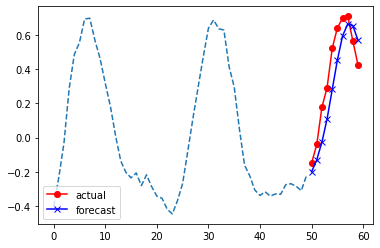

In [51]:
plt.plot(np.arange(50), x_new[0], "--")
plt.plot(np.arange(50, 60), y_new[0], "ro-", label="actual")
plt.plot(np.arange(50, 60), y_pred[0], "bx-", label='forecast')
plt.legend()
plt.show()

In [52]:
series = generate_time_series(10000, n_steps + 10)

In [53]:
series.shape

(10000, 60, 1)

In [54]:
x_train, y_train = series[:7000, :n_steps], series[:7000, -10:, 0]
x_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -10:, 0]
x_test, y_test = series[9000:, :n_steps], series[9000:, -10:, 0]

In [55]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20),
    keras.layers.Dense(10)
])

In [63]:
model.compile(optimizer='Adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=20)

Epoch 1/20
219/219 [==============================] - 3s 8ms/step - loss: 0.1241
Epoch 2/20
219/219 [==============================] - 2s 7ms/step - loss: 0.0254
Epoch 3/20
219/219 [==============================] - 2s 7ms/step - loss: 0.0181
Epoch 4/20
219/219 [==============================] - 2s 7ms/step - loss: 0.0154
Epoch 5/20
219/219 [==============================] - 2s 7ms/step - loss: 0.0137
Epoch 6/20
219/219 [==============================] - 2s 7ms/step - loss: 0.0124
Epoch 7/20
219/219 [==============================] - 2s 7ms/step - loss: 0.0118
Epoch 8/20
219/219 [==============================] - 2s 8ms/step - loss: 0.0116
Epoch 9/20
219/219 [==============================] - 2s 7ms/step - loss: 0.0109
Epoch 10/20
219/219 [==============================] - 2s 7ms/step - loss: 0.0103
Epoch 11/20
219/219 [==============================] - 2s 7ms/step - loss: 0.0102
Epoch 12/20
219/219 [==============================] - 2s 7ms/step - loss: 0.0100
Epoch 13/20
219/219 [====

In [64]:
y_pred = model.predict(x_new)

In [65]:
y_pred = y_pred[..., np.newaxis]
y_pred.shape

(1, 10, 1)

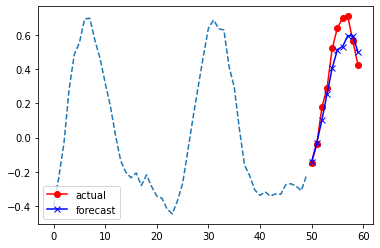

In [66]:
plt.plot(np.arange(50), x_new[0], "--")
plt.plot(np.arange(50, 60), y_new[0], "ro-", label="actual")
plt.plot(np.arange(50, 60), y_pred[0], "bx-", label='forecast')
plt.legend()
plt.show()

In [67]:
y = np.empty((10000, n_steps, 10))
for step_ahead in range(1, 10 + 1):
    y[:, :, step_ahead - 1] = series[:, step_ahead:step_ahead + n_steps, 0]
y_train = y[:7000]
y_valid = y[7000:9000]
y_test = y[9000:]

In [68]:
keras.backend.clear_session()

In [69]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20, return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])

In [70]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, None, 20)          440       
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, None, 20)          820       
_________________________________________________________________
time_distributed (TimeDistri (None, None, 10)          210       
Total params: 1,470
Trainable params: 1,470
Non-trainable params: 0
_________________________________________________________________


In [77]:
def last_time_step_mse(y_true, y_pred):
    return keras.metrics.mean_squared_error(y_true[:, -1], y_pred[:, -1])

optimizer = keras.optimizers.Adam(lr=0.01)
model.compile(loss='mse', optimizer=optimizer, metrics=[last_time_step_mse])

In [78]:
model.fit(x_train, y_train, epochs=20, validation_data=(x_valid, y_valid))

Epoch 1/20
219/219 [==============================] - 3s 10ms/step - loss: 0.0696 - last_time_step_mse: 0.0604 - val_loss: 0.0406 - val_last_time_step_mse: 0.0290
Epoch 2/20
219/219 [==============================] - 2s 8ms/step - loss: 0.0359 - last_time_step_mse: 0.0239 - val_loss: 0.0316 - val_last_time_step_mse: 0.0215
Epoch 3/20
219/219 [==============================] - 2s 8ms/step - loss: 0.0304 - last_time_step_mse: 0.0177 - val_loss: 0.0278 - val_last_time_step_mse: 0.0147
Epoch 4/20
219/219 [==============================] - 2s 8ms/step - loss: 0.0282 - last_time_step_mse: 0.0148 - val_loss: 0.0268 - val_last_time_step_mse: 0.0143
Epoch 5/20
219/219 [==============================] - 2s 8ms/step - loss: 0.0251 - last_time_step_mse: 0.0121 - val_loss: 0.0249 - val_last_time_step_mse: 0.0126
Epoch 6/20
219/219 [==============================] - 2s 8ms/step - loss: 0.0243 - last_time_step_mse: 0.0118 - val_loss: 0.0211 - val_last_time_step_mse: 0.0079
Epoch 7/20
219/219 [=======

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras